# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

goal is to understand
	-  what factors influence a car
		- price ( more or less expensive)?
		- what factors buyers consider most?
As a result of analysis,
	- provide clear recommendations to car dealer
			- what consumers value in a used car.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


###Data exploration

In [8]:
# read data from csv file
df = pd.read_csv('/content/vehicles.csv')

In [22]:
# find data infor
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [23]:
# List % of nulls for each column and sort them
df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

,0
size,71.77
cylinders,41.62
condition,40.79
VIN,37.73
drive,30.59
paint_color,30.50
type,21.75
manufacturer,4.13
title_status,1.93
model,1.24


In [26]:
# find corr
df.corr(numeric_only=True).round(4)

,id,price,year,odometer
id,1.0000,-0.0028,-0.0590,0.0107
price,-0.0028,1.0000,-0.0049,0.0100
year,-0.0590,-0.0049,1.0000,-0.1572
odometer,0.0107,0.0100,-0.1572,1.0000


Obs: seems very low correlation between price and year, price and odometer.

In [27]:
# Check the number of unique values of each column
df.nunique().sort_values(ascending=False)

,0
id,426880
VIN,118246
odometer,104870
model,29649
price,15655
region,404
year,114
state,51
manufacturer,42
type,13


In [28]:
df.sample(3)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
290468,7311587434,cincinnati,0,2013.0,kia,optima,excellent,4 cylinders,gas,115794.0,clean,automatic,5XXGM4A70DG195933,fwd,NaN,NaN,custom,oh
54356,7316869438,san diego,6500,2001.0,toyota,4runner sr5,good,4 cylinders,gas,220000.0,clean,automatic,NaN,rwd,full-size,SUV,silver,ca
252223,7305480966,central NJ,6375,2008.0,nissan,rogue,good,4 cylinders,gas,110880.0,clean,automatic,JN8AS58V08W143281,4wd,compact,SUV,orange,nj


Try finding columns with NaN values.

In [12]:
s = df.eq(np.NaN).any()
s

,0
id,False
region,False
price,False
year,False
manufacturer,False
model,False
condition,False
cylinders,False
fuel,False
odometer,False


Good. no columns with NaN values.

Try finding columns with 0 values.

In [14]:
s = df.eq(0).any()
s

,0
id,False
region,False
price,True
year,False
manufacturer,False
model,False
condition,False
cylinders,False
fuel,False
odometer,True


Lets find out how many values are zero for each (numeric) column.

In [19]:
z = df.eq(0).sum()
z

,0
id,0
region,0
price,32895
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,1965


so price and odometer columns have significant rows with zero values.

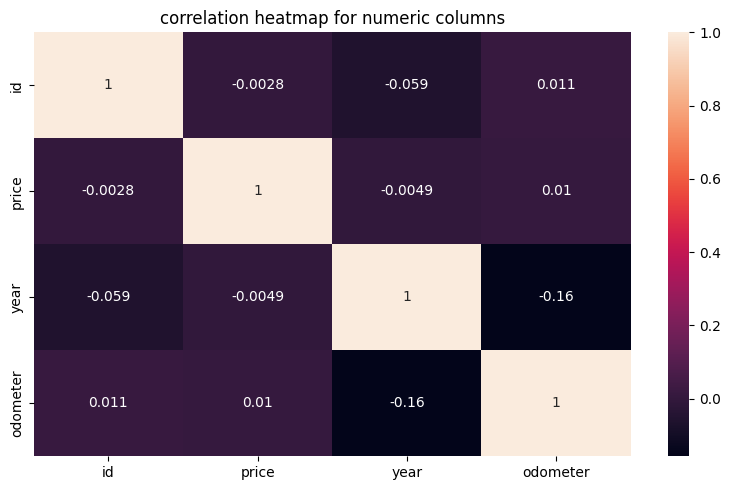

In [34]:
# Now lets look at some visualization of the provided datasets

fig, ax = plt.subplots(figsize=(8,5))
plt.rcParams["figure.autolayout"] = True

# create seaborn heatmap
ax = sns.heatmap(df.corr(numeric_only=True).round(4), annot = True)

# Title to the Plot
ax.set_title("correlation heatmap for numeric columns")

#
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()

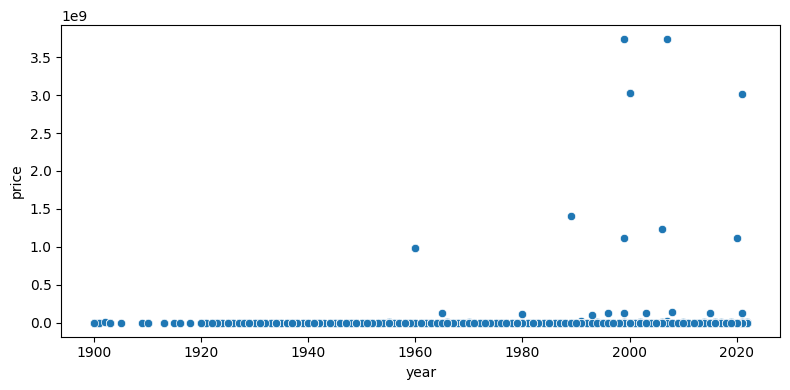

In [33]:
# try scatterplot between price and year

plt.figure(figsize=(8,4))
sns.scatterplot(x='year',y='price',data=df)
plt.show()

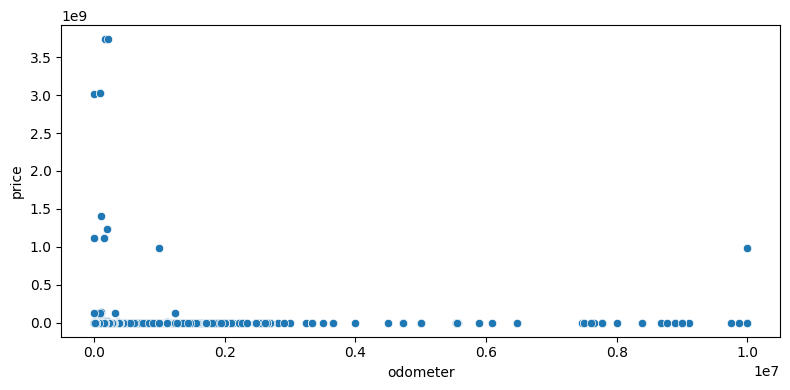

In [37]:
## above charts, um.... this looks pretty odd. not much use. not so quality data.
## lets look at odometer and price

plt.figure(figsize=(8,4))
sns.scatterplot(x='odometer',y='price',data=df)
plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7b1c36a5e4d0> (for post_execute):


KeyboardInterrupt: 

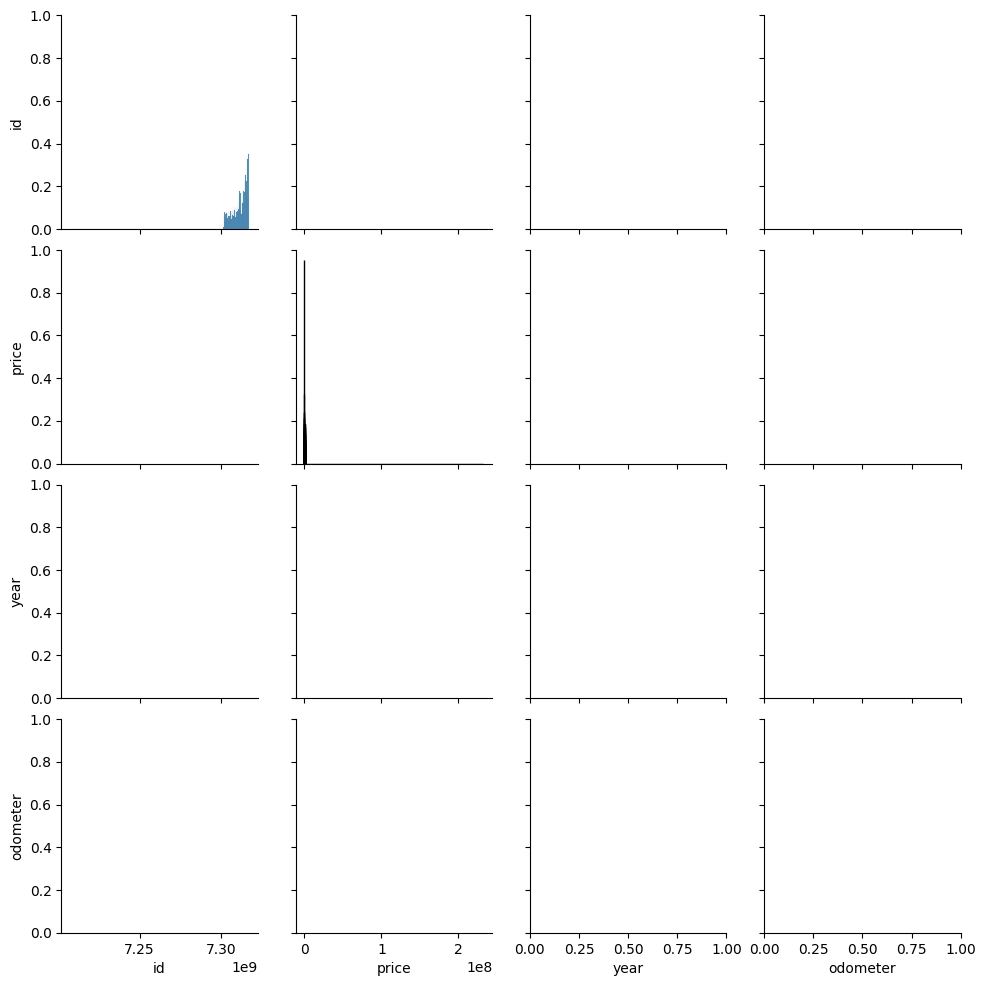

In [38]:
# let's print pairplot
# sns.pairplot(df)
# plt.show()

In [40]:
# describe all
df.describe(include='all')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880.00,426880,426880.00,425675.00,409234,421603,252776,249202,423867,422480.00,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7311486634.22,NaN,75199.03,2011.24,NaN,NaN,NaN,NaN,NaN,98043.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4473170.41,NaN,12182282.17,9.45,NaN,NaN,NaN,NaN,NaN,213881.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7207408119.00,NaN,0.00,1900.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7308143339.25,NaN,5900.00,2008.00,NaN,NaN,NaN,NaN,NaN,37704.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7312620821.00,NaN,13950.00,2013.00,NaN,NaN,NaN,NaN,NaN,85548.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7315253543.50,NaN,26485.75,2017.00,NaN,NaN,NaN,NaN,NaN,133542.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

From above data exploration, after carefully considering
- unique values
- min and max
- % of null and NaN values

Following columns can be dropped.
size, cyclinder, condition, drive, paint_color, type columns have 20% null values. so dropping them from dataset.

In [42]:
df = df.drop(['size','cylinders','condition', 'drive', 'type', 'paint_color'],axis=1)
df.shape

(426880, 12)

And, from general knowledge, we know that id, VIN number columns have no bearing on price and has no influence on price. so remove that column.

In [43]:
df = df.drop(['id','VIN'],axis=1)
df.shape

(426880, 10)

In [44]:
df.describe(include='all')

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
count,426880,426880.00,425675.00,409234,421603,423867,422480.00,418638,424324,426880
unique,404,NaN,NaN,42,29649,5,NaN,6,3,51
top,columbus,NaN,NaN,ford,f-150,gas,NaN,clean,automatic,ca
freq,3608,NaN,NaN,70985,8009,356209,NaN,405117,336524,50614
mean,NaN,75199.03,2011.24,NaN,NaN,NaN,98043.33,NaN,NaN,NaN
std,NaN,12182282.17,9.45,NaN,NaN,NaN,213881.50,NaN,NaN,NaN
min,NaN,0.00,1900.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN
25%,NaN,5900.00,2008.00,NaN,NaN,NaN,37704.00,NaN,NaN,NaN
50%,NaN,13950.00,2013.00,NaN,NaN,NaN,85548.00,NaN,NaN,NaN
75%,NaN,26485.75,2017.00,NaN,NaN,NaN,133542.50,NaN,NaN,NaN


now drop rows with null and NaN values.

In [45]:
df = df.dropna()
df.shape

(389604, 10)

In [46]:
df.describe(include='all')

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
count,389604,389604.00,389604.00,389604,389604,389604,389604.00,389604,389604,389604
unique,404,NaN,NaN,41,21860,5,NaN,6,3,51
top,columbus,NaN,NaN,ford,f-150,gas,NaN,clean,automatic,ca
freq,3334,NaN,NaN,67811,7786,329679,NaN,377138,309260,45131
mean,NaN,63955.28,2011.61,NaN,NaN,NaN,96352.40,NaN,NaN,NaN
std,NaN,11448646.03,8.64,NaN,NaN,NaN,191418.11,NaN,NaN,NaN
min,NaN,0.00,1900.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN
25%,NaN,5995.00,2009.00,NaN,NaN,NaN,38093.00,NaN,NaN,NaN
50%,NaN,13995.00,2014.00,NaN,NaN,NaN,85753.00,NaN,NaN,NaN
75%,NaN,26590.00,2017.00,NaN,NaN,NaN,133315.00,NaN,NaN,NaN


from desription of data, there are too many regions, state, models and manufacturer. and they are categorical. so by scaling them into features, it leads to too many features and making it very difficult to analyze the data. so dropp ing those columns.

In [47]:
df = df.drop(['region','state','model','manufacturer'],axis=1)
df.shape

(389604, 6)

In [48]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe(include='all')

,price,year,fuel,odometer,title_status,transmission
count,389604.00,389604.00,389604,389604.00,389604,389604
unique,NaN,NaN,5,NaN,6,3
top,NaN,NaN,gas,NaN,clean,automatic
freq,NaN,NaN,329679,NaN,377138,309260
mean,63955.28,2011.61,NaN,96352.40,NaN,NaN
std,11448646.03,8.64,NaN,191418.11,NaN,NaN
min,0.00,1900.00,NaN,0.00,NaN,NaN
25%,5995.00,2009.00,NaN,38093.00,NaN,NaN
50%,13995.00,2014.00,NaN,85753.00,NaN,NaN
75%,26590.00,2017.00,NaN,133315.00,NaN,NaN


now try to remove any anamolies.

In [49]:
q = df['price'].quantile(q = 0.99)
q

64999.0

In [50]:
df_1 = df[df['price']<q]
df_1.shape

(385671, 6)

In [51]:
odometer_q = df['odometer'].quantile(q = 0.95)
odometer_q

201928.54999999993

In [52]:
df_2 = df_1[df_1['odometer']<odometer_q]
df_2.shape

(366207, 6)

In [53]:
df_3 = df_2[df_2['year']>=1995]
df_3.shape

(355389, 6)

<ipython-input-54-d80fcfd5d02f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_3['price'])


(1996.0, 63995.0)

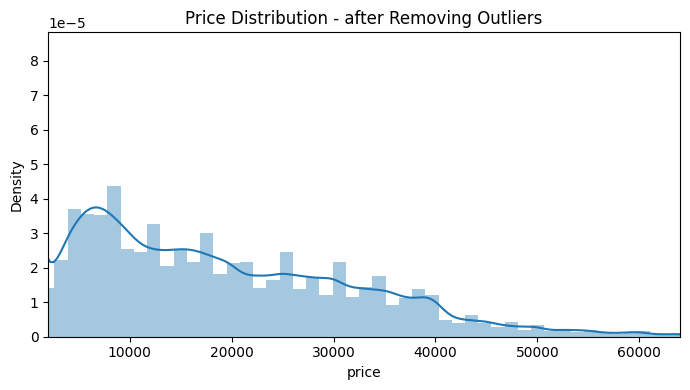

In [54]:
plt.figure(figsize=(7,4))
sns.distplot(df_3['price'])
plt.title('Price Distribution - after Removing Outliers')
plt.xlim(1996,63995)

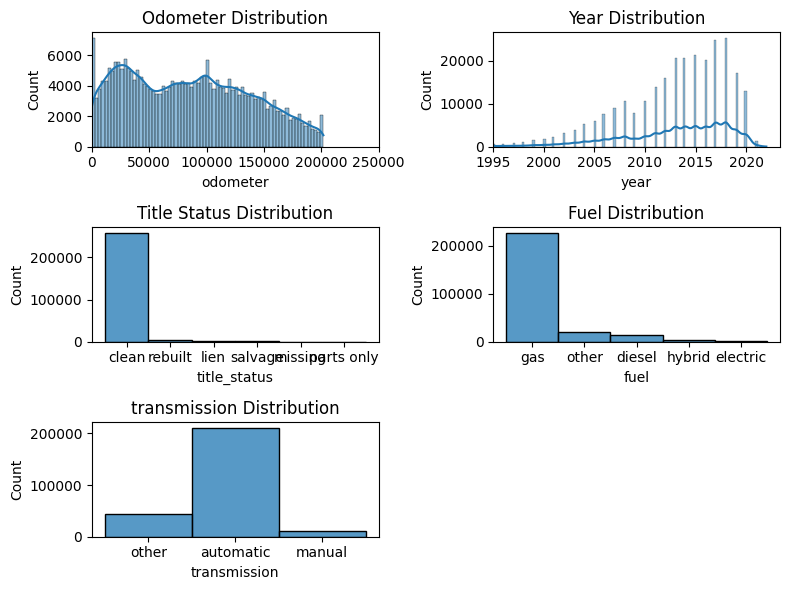

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid layout (or adjust dimensions as needed)
fig, axes = plt.subplots(3, 2, figsize=(8, 6))  # 2 rows, 2 columns

# First plot (Odometer Distribution)
sns.histplot(df_3['odometer'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Odometer Distribution')
axes[0, 0].set_xlim(0, 250000)

# Second plot (Year Distribution)
sns.histplot(df_3['year'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Year Distribution')
axes[0, 1].set_xlim(1995,)

# Third plot (Title Status Distribution)
sns.histplot(df_3['title_status'], kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Title Status Distribution')

# Fourth plot (Title Status Distribution)
sns.histplot(df_3['fuel'], kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Fuel Distribution')

# Fifth plot (Title Status Distribution)
sns.histplot(df_3['transmission'], kde=False, ax=axes[2, 0])
axes[2, 0].set_title('transmission Distribution')


# Turn off the last unused plot (if any)
axes[2, 1].axis('off')  # If the grid has more spaces than plots

# Adjust layout
plt.tight_layout()
plt.show()


looking at distribution charts, decided to drop title status distributions because most of the data has only one value.

In [59]:
df_4 = df_3.drop(['title_status'],axis=1)
df_4.shape

(355389, 5)

lets reset the index.

In [56]:
df_4.reset_index(drop=True,inplace=True)
df_4.shape

(355389, 4)

In [60]:
df_4.columns

Index(['price', 'year', 'fuel', 'odometer', 'transmission'], dtype='object')

In [63]:
# scale
model_df=pd.get_dummies(df_4, columns=["transmission", "fuel" ], dtype=int)
model_df.head()

,price,year,odometer,transmission_automatic,transmission_manual,transmission_other,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
27,33590,2014.00,57923.00,0,0,1,0,0,1,0,0
28,22590,2010.00,71229.00,0,0,1,0,0,1,0,0
29,39590,2020.00,19160.00,0,0,1,0,0,1,0,0
30,30990,2017.00,41124.00,0,0,1,0,0,1,0,0
31,15000,2013.00,128000.00,1,0,0,0,0,1,0,0


In [65]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355389 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   price                   355389 non-null  int64  
 1   year                    355389 non-null  float64
 2   odometer                355389 non-null  float64
 3   transmission_automatic  355389 non-null  int64  
 4   transmission_manual     355389 non-null  int64  
 5   transmission_other      355389 non-null  int64  
 6   fuel_diesel             355389 non-null  int64  
 7   fuel_electric           355389 non-null  int64  
 8   fuel_gas                355389 non-null  int64  
 9   fuel_hybrid             355389 non-null  int64  
 10  fuel_other              355389 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 32.5 MB


draw scatter plots for year, odometer and transmission against price

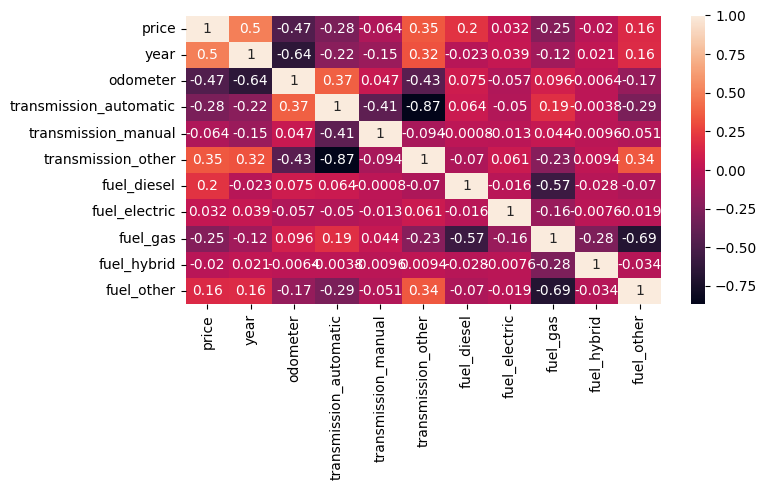

In [67]:
# plt.figure(figsize=(16,4))

# plt.subplot(1,3,1)
# sns.scatterplot(x='year',y='price',data=df_4)

# plt.subplot(1,3,2)
# sns.scatterplot(x='odometer',y='price',data=df_4)

# plt.subplot(1,3,3)
# sns.scatterplot(x='transmission',y='price',data=df_4)

# plt.show()



fig, ax = plt.subplots(figsize=(8,5))
plt.rcParams["figure.autolayout"] = True

# create seaborn heatmap
ax = sns.heatmap(model_df.corr(numeric_only=False).round(4), annot = True)

#
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()


scaling the data. use log value for price column for the remaining dataset

In [25]:
df_4.columns

Index(['price', 'year', 'odometer', 'transmission'], dtype='object')

In [68]:
# pd.set_option('display.float_format', '{:.4f}'.format)
# price_log = np.log(df_4['price'])
# df_4['price_log'] = price_log
# df_4.head()

In [69]:
# plt.figure(figsize=(16,5))

# plt.subplot(1,3,1)
# sns.scatterplot(x=df_4['year'],y=df_4['price_log'])

# plt.subplot(1,3,2)
# sns.scatterplot(x='odometer',y='price_log',data=df_4)

# plt.subplot(1,3,3)
# sns.scatterplot(x='transmission',y='price_log',data=df_4)

# plt.show()

In [70]:
#now drop price column
# df_4 = df_4.drop(['price'],axis=1)
# df_4.sample(3)

In [71]:
# get dummies
# df_5 = pd.get_dummies(df_4,drop_first=True)
# df_5

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [72]:
# now get some models
X = model_df.drop(['price'], axis = 1)
y = model_df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [73]:
#  fit intercept = false sets the y-intercept to 0.
model=LinearRegression(fit_intercept=False)

In [74]:
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [75]:
[(col, coef) for col, coef in zip (X_train.columns, model.coef_)]

[('year', 817.4708766100161),
 ('odometer', -0.054711429562981806),
 ('transmission_automatic', -1014931.0230478636),
 ('transmission_manual', -1014317.0362715746),
 ('transmission_other', -1009036.2786961794),
 ('fuel_diesel', -596291.0428209263),
 ('fuel_electric', -609786.9768247053),
 ('fuel_gas', -610391.2482239353),
 ('fuel_hybrid', -613094.9564855292),
 ('fuel_other', -608720.1136605213)]

In [76]:
# get predictions based on training data.
train_predictions=model.predict(X_train)
train_predictions

array([30402.65837232, 15592.93126448,  1412.76751379, ...,
       39052.78536788, 28372.42528918, 13350.09081738])

In [77]:
# find the score
score = model.score(X_train, y_train)
print("Accuracy: ", round(score*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y_train,train_predictions)), 2))

Accuracy:  36.18
RMSE:      10929.87


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.